# IMDb Review Tutorial 
#### ***[코드출처: 오늘코드(박조은 님)](https://github.com/corazzon)***

![](https://static.amazon.jobs/teams/53/images/IMDb_Header_Page.jpg?1501027252)

## [자연어 처리란? - 위키백과](http://ko.wikipedia.org/wiki/자연어_처리)
- 자연어 처리(自然語處理) 또는 자연 언어 처리(自然言語處理)는 인간의 언어 현상을 컴퓨터와 같은 기계를 이용해서 모사 할수 있도록 연구하고 이를 구현하는 인공지능의 주요 분야 중 하나 (출처: 위키피디아)

## 자연어처리(NLP)와 관련된 캐글 Competition
- [Sentiment Analysis on Movie Review](https://www.kaggle.com/c/sentiment-analysis-on-movie-reviews)
- [Jigsaw Toxic Comment Classification](https://www.kaggle.com/c/jigsaw-toxic-comment-classification-challenge)
- [Spooky Author Identification](https://www.kaggle.com/c/spooky-author-identification)

## **튜토리얼 개요**

### Part 1. 
#### - 초보자를 대상으로 하는 기본 자연어 처리를 다룬다.

### Part 2.
#### - Word2Vec을 사용하여 모델을 학습시키는 방법과 감정분석에 단어 벡터를 사용하는 방법을 본다.
#### - Part 3은 레시피를 제공하지 않고 Word2Vec을 사용하는 몇가지 방법을 실험해 본다.
#### - Part 3에서는 K-means 알고리즘을 사용해 군집화를 해본다.
#### - 긍정과 부정 리뷰가 섞여있는 100,000개의 IMDb 감정분석 데이터 셋을 통해 목표를 달성해 본다.

## **평가 - ROC Curve**

## Word2Vec이란?

### - 자연어 텍스트를 분석해서 특정단어를 얼마나 사용했는지, 얼마나 자주 사용했는지, 어떤 종류의 텍스트인지 분류하거나 긍정인지 부정인지에 대한 감정분석, 그리고 어떤 내용인지 요약하는 정보를 얻을 수 있다.

### - 감정분석은 머신러닝에서 어려운 주제로 풍자, 애매모호한 말, 반어법, 언어 유희로 표현을 하는데 이는 사람과 컴퓨터에게 모두 오해의 소지가 있다. 여기에서는 Word2Vec을 통한 감정분석을 해보는 튜토리얼을 해본다.

### - Google의 Word2Vec은 단어의 의미와 관계를 이해하는 데 도움이 된다.

### - 상당수의 NLP기능은 NLTK모듈에 구현되어 있는데 이 모듈은 코퍼스, 함수와 알고리즘으로 구성되어 있다. [코퍼스란? 말뭉치를 의미 (위키피디아)](https://ko.wikipedia.org/wiki/%EB%A7%90%EB%AD%89%EC%B9%98)

### [Word2Vec - 위키독스](https://wikidocs.net/22660)

## BOW(Bag of Words)

### - 가장 간단하지만 효과적이라 널리 쓰이는 방법
### - 장, 문단, 문장, 서식과 같은 입력 텍스트의 구조를 제외하고 각 단어가 이 말뭉치에 얼마나 많이 나타나는지만 헤어린다.
### - 구조와 상관없이 단어의 출현횟수만 세기 때문에 텍스트를 담는 가방(Bag)이라고 생각할 수 있다.
### - BOW는 단어의 순서과 완전히 무시 된다는 단점이 있다. 예를 들어 의미가 완전히 반대인 두 문장이 있다고 하면,
* It's bad, not good at all.
* It's good, not bad at all.

### - 위 두 문장은 의미가 전혀 반대지만 완전히 동일하게 반환된다.
### - 이를 보완하기 위해 n-gram을 사용하는데 BOW는 하나의 토큰을 사용하지만 n-gram은 n개의 토큰을 사용할 수 있도록 한다.

### [BOW - 위키독스](https://wikidocs.net/22650)

# Part 1. NLP란? & Pandas 데이터 불러오기, 정제하기 & 벡터화 & 감정분석

## NLP(자연어처리)는 텍스트 문제에 접근하기 위한 기술집합이다. 이 튜토리얼에서는 IMDb 영화 리뷰를 로딩하고 정제하고 간단한 BOW 모델을 적용하여 리뷰가 추천인지 아닌지에 대한 정확도를 예측한다.

## Train 데이터의 텍스트를 바탕으로 Test 데이터의 Setiment을 예측
## 0이면 부정, 1이면 긍정

In [1]:
import os
os.listdir("../input/nlp-dataset")

# 파일의 디렉토리를 확인한다. (압축해제 후 다시 업로드한 데이터셋)

['testData.tsv',
 'sampleSubmission.csv',
 'unlabeledTrainData.tsv',
 'labeledTrainData.tsv']

In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc

sns.set_style('whitegrid')

import warnings 
warnings.filterwarnings("ignore")

%matplotlib inline

In [3]:
plt.rcParams["axes.unicode_minus"] = False
fontpath = "../input/koreanfont/a3.ttf"
fontprop = font_manager.FontProperties(fname = fontpath)

In [4]:
df_train = pd.read_csv("../input/nlp-dataset/labeledTrainData.tsv",
                       header = 0, delimiter = "\t", quoting = 3)

df_test = pd.read_csv("../input/nlp-dataset/testData.tsv",
                      header = 0, delimiter = "\t", quoting = 3)

df_train.shape

# header = 0 : 파일의 첫 번째 줄에 열 이름이 있음을 나타낸다.
# delimiter = "\t" : \t는 필드가 tab으로 구분되는 것을 의미한다.
# quoting = 3 : 3은 텍스트의 쌍따옴표를 무시하도록 한다.

(25000, 3)

In [5]:
df_train.head()

,id,sentiment,review
0,"""5814_8""",1,"""With all this stuff going down at the moment ..."
1,"""2381_9""",1,"""\""The Classic War of the Worlds\"" by Timothy ..."
2,"""7759_3""",0,"""The film starts with a manager (Nicholas Bell..."
3,"""3630_4""",0,"""It must be assumed that those who praised thi..."
4,"""9495_8""",1,"""Superbly trashy and wondrously unpretentious ..."


In [6]:
df_test.shape

(25000, 2)

In [7]:
df_test.head()

,id,review
0,"""12311_10""","""Naturally in a film who's main themes are of ..."
1,"""8348_2""","""This movie is a disaster within a disaster fi..."
2,"""5828_4""","""All in all, this is a movie for kids. We saw ..."
3,"""7186_2""","""Afraid of the Dark left me with the impressio..."
4,"""12128_7""","""A very accurate depiction of small time mob l..."


In [8]:
print("Train Columns: ")  
print(df_train.columns.values)
print("----------------------------")
print("Test Columns: ")  
print(df_test.columns.values)

# Test 데이터 셋에 없는 Sentiment를 예측한다.

Train Columns: 
['id' 'sentiment' 'review']
----------------------------
Test Columns: 
['id' 'review']


In [9]:
df_train.info()

# null value는 없다.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 3 columns):
id           25000 non-null object
sentiment    25000 non-null int64
review       25000 non-null object
dtypes: int64(1), object(2)
memory usage: 586.1+ KB


In [10]:
df_train.describe()

# sentiment의 통계값 확인

,sentiment
count,25000.00000
mean,0.50000
std,0.50001
min,0.00000
25%,0.00000
50%,0.50000
75%,1.00000
max,1.00000


In [11]:
df_train["sentiment"].value_counts()

# sentiment의 클래스가 딱 절반으로 되어있음을 알 수 있다. (부정, 긍정)

1    12500
0    12500
Name: sentiment, dtype: int64

In [12]:
df_train["review"][0][:700]

# review 컬럼을 700자 까지만 확인해본다.

'"With all this stuff going down at the moment with MJ i\'ve started listening to his music, watching the odd documentary here and there, watched The Wiz and watched Moonwalker again. Maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent. Moonwalker is part biography, part feature film which i remember going to see at the cinema when it was originally released. Some of it has subtle messages about MJ\'s feeling towards the press and also the obvious message of drugs are bad m\'kay.<br /><br />Visually impressive but of course this is all about Michael Jackson so unless you remotely lik'

## 데이터 정제 Data Cleaning and Text Preprocessing

### 기계가 텍스트를 이해할 수 있도록 텍스트를 정제해 준다.
### 신호와 소음을 구분한다. 아웃라이어 데이터로 인한 오버피팅을 방지한다.

1. BeatifulSoup을 통해 HTML태그를 제거
2. 정규표현식으로 알파벳 이외의 문자를 공백으로 치환
3. NLTK 데이터를 사용해 불용어제거
4. 어간추출(Stemming)과 음소표기법(Lemmatizing)의 개념을 이해하고 어간을 추출

## 텍스트 데이터 전처리 이해하기
### 정규화 normalization
 - 한국어를 처리하는 예시 (입니닼ㅋㅋ -> 입니다 ㅋㅋ 등)
### 토큰화 tokenization
 - 한국어를 처리하는 예시 (한국어 Noun, 를 Josa, 처리Noun, 하는 Adjective, 예시Noun)

In [13]:
!pip install BeautifulSoup4

In [14]:
from bs4 import BeautifulSoup

exam1 = BeautifulSoup(df_train["review"][0], "html5lib")
print(df_train["review"][0][:700])
exam1.get_text()[:700]

# BeautifulSoup을 불러와서 review를 확인한다. 
# 그냥 print 한것과 exam으로 불러온 텍스트를 비교해보면 
# <br \>과 같은 html 태그들이 사라진 것을 볼 수있다.

"With all this stuff going down at the moment with MJ i've started listening to his music, watching the odd documentary here and there, watched The Wiz and watched Moonwalker again. Maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent. Moonwalker is part biography, part feature film which i remember going to see at the cinema when it was originally released. Some of it has subtle messages about MJ's feeling towards the press and also the obvious message of drugs are bad m'kay.<br /><br />Visually impressive but of course this is all about Michael Jackson so unless you remotely lik


'"With all this stuff going down at the moment with MJ i\'ve started listening to his music, watching the odd documentary here and there, watched The Wiz and watched Moonwalker again. Maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent. Moonwalker is part biography, part feature film which i remember going to see at the cinema when it was originally released. Some of it has subtle messages about MJ\'s feeling towards the press and also the obvious message of drugs are bad m\'kay.Visually impressive but of course this is all about Michael Jackson so unless you remotely like MJ in anyw'

In [15]:
import re

letters_only = re.sub("[^a-zA-Z]", " ", exam1.get_text())
letters_only[:700]

# re를 불러와서 정규표현식으로 특수문자를 제거한다.
# 소문자와 대문자가 아닌 것은 공백으로 대체한다 (re.sub("바꿔야할것", "바꾸고싶은것"))
# output을 보면 특수문자들이 전부 공백으로 대체된 것을 볼 수 있다.

' With all this stuff going down at the moment with MJ i ve started listening to his music  watching the odd documentary here and there  watched The Wiz and watched Moonwalker again  Maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent  Moonwalker is part biography  part feature film which i remember going to see at the cinema when it was originally released  Some of it has subtle messages about MJ s feeling towards the press and also the obvious message of drugs are bad m kay Visually impressive but of course this is all about Michael Jackson so unless you remotely like MJ in anyw'

In [16]:
lower_case = letters_only.lower()

words = lower_case.split()
print(len(words))
words[:10]

# letters_only를 전부 소문자로 대체해준다.
# split을 사용하여 단어단위로 나눈다. (토큰화)
# 437개의 토큰으로 이루어져 있다.

437


['with',
 'all',
 'this',
 'stuff',
 'going',
 'down',
 'at',
 'the',
 'moment',
 'with']

### 불용어 제거 (Stopword Removal)
- 일반적으로 코퍼스에서 자주 나타나는 단어는 학습 모델로서 학습이나 예측 프로세스에 실제로 기여하지 않아 다른 텍스트와 구별하지 못한다.
- 예를들어 조사, 접미사, i, me, it, this, that, is, are 등 같은 단어는 빈번하게 등장하지만 실제 의미를 찾는데 큰 기여를 하지 않는다.
- Stopwords는 "to" 또는 "the"와 같은 용어를 포함하므로 사전 처리 단계에서 제거하는 것이 좋다.
- NLTK에는 153개의 영어 불용어가 미리 정의되어 있다. 
- 17개의 언어에 대해 정의되어 있으며 한국어는 없다. 

In [17]:
import nltk
from nltk.corpus import stopwords
stopwords.words("english")[:10]

# NLTK를 불러오고, stopwords까지 불러와서 확인해본다. 

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [18]:
words = [w for w in words if not w in stopwords.words("english")]
print(len(words))
words[:10]

# words에 담겨져 있던 단어에 Stopwords가 있다면 제거한다.
# 제거한 토큰들을 확인한다.
# 토큰이 437개에서 219개로 줄어들었음을 알 수 있다.

219


['stuff',
 'going',
 'moment',
 'mj',
 'started',
 'listening',
 'music',
 'watching',
 'odd',
 'documentary']

### 스테밍(어간추출, 형태소 분석)
#### 출처: [어간추출 - 위키피디아](https://ko.wikipedia.org/wiki/%EC%96%B4%EA%B0%84_%EC%B6%94%EC%B6%9C)

- 어간 추출은 어형이 변형된 단어로부터 접사 등을 제거하고 그 단어의 어간을 분리해내는 것
- "message", "messages", "messaging"과 같이 복수형, 진행형 등의 문자를 같은 의미의 단어로 다룰 수 있도록 도와준다.
- stemming(형태소 분석): 여기에서는 NLTK에서 제공하는 형태소 분석기를 사용한다. 여러가지 stemmer들이 있는데, 포커 형태소 분석기는 보수적이고 랭커스터 형태소 분석기는 좀 더 적극적이다. 
- 형태소 분석 규칙의 적극성 때문에 랭커스터 형태소 분석기는 더 많은 동음이의어 형태소를 생산한다. 

In [19]:
# 포터 스태머의 사용 예시

stemmer = nltk.stem.PorterStemmer()
print(stemmer.stem("maximum"))
print("The stemmed form of running is : {}".format(stemmer.stem("running")))
print("The stemmed form of runs is: {}".format(stemmer.stem("runs")))
print("Tje stemmed form of run is: {}".format(stemmer.stem("run")))

# maximum이 그대로 출력된다. 
# run의 변형어들은 run으로 어간이 추출된다.

maximum
The stemmed form of running is : run
The stemmed form of runs is: run
Tje stemmed form of run is: run


In [20]:
# 랭커스터 스태머의 사용 예시

from nltk.stem.lancaster import LancasterStemmer

lanc_stemmer = LancasterStemmer()
print(lanc_stemmer.stem("maximum"))
print("The stemmed form of running is : {}".format(lanc_stemmer.stem("running")))
print("The stemmed form of runs is: {}".format(lanc_stemmer.stem("runs")))
print("Tje stemmed form of run is: {}".format(lanc_stemmer.stem("run")))

# maximum의 어간이 maxim으로 추출된다.
# run의 변형어들은 마찬가지로 run으로 어간이 추출된다.

maxim
The stemmed form of running is : run
The stemmed form of runs is: run
Tje stemmed form of run is: run


In [21]:
words[:10]

# 처리하기 전 단어들을 확인해본다.
# going, started 등 변형된 단어가 있음을 알 수 있다.

['stuff',
 'going',
 'moment',
 'mj',
 'started',
 'listening',
 'music',
 'watching',
 'odd',
 'documentary']

In [22]:
from nltk.stem.snowball import SnowballStemmer

stemmer = SnowballStemmer("english")
words = [stemmer.stem(w) for w in words]

words[:10]

# 튜토리얼에서는 스노우볼 스태머를 사용해서 words의 어간을 추출해본다.
# going, started등 어간이 잘 추출된 것을 확인할 수 있다. 

['stuff',
 'go',
 'moment',
 'mj',
 'start',
 'listen',
 'music',
 'watch',
 'odd',
 'documentari']

### Lemmatization (음소표기법)
#### 언어학에서 음소표기법은 단어의 보조 정리 또는 사전 형식에 의해 식별되는 단일 항목으로 분석 될 수 있도록 굴절 된 형태의 단어를 그룹화하는 과정이다. 예를 들어 동음이의어가 문맥에 따라 다른 의미를 갖는데, 
 1. 배가 맛있다.
 2. 배를 타는것이 재미있다.
 3. 평소보다 두 배로 많이 먹어서 배가 아프다.

#### 위에 있는 3개의 문장에 있는 "배"는 모두 다른 의미를 갖는다.
#### Lemmatization은 이 때 앞뒤 문맥을 보고 단어의 의미를 식별하는 것이다. 
#### 영어에서 meet는 meeting으로 쓰였을 때 회의를 뜻하지만 meet일 때는 만나다는 뜻을 갖는데, 그 단어가 명사로 쓰였는지 동사로 쓰였는지에 따라 적합한 의미를 갖도록 추출하는 것이다. 

* 참고:
 * [Lemmatization - 위키피디아](https://en.wikipedia.org/wiki/Lemmatisation)
 * [Stemming과 Lemmatization의 차이](https://4four.us/article/2008/05/lemmatization)

In [23]:
from nltk.stem import WordNetLemmatizer
wordnet_lem = WordNetLemmatizer()

print(wordnet_lem.lemmatize("fly"))
print(wordnet_lem.lemmatize("flies"))

words = [wordnet_lem.lemmatize(w) for w in words]

words[:10]

# lemmatizer를 사용하여 fly, flies를 처리하면 둘 다 fly로 바뀐다.
# words를 lemmatization 처리한 후 결과를 확인해본다.
# stemming한 결과와 마찬가지로 출력된다.

fly
fly


['stuff',
 'go',
 'moment',
 'mj',
 'start',
 'listen',
 'music',
 'watch',
 'odd',
 'documentari']

## 문자열 처리
#### 위에서 간략하게 살펴본 내용을 바탕으로 문자열을 처리해 본다.

In [24]:
# 위에서 배운 내용을 바탕을 전체적으로 수행할 수 있도록 함수를 만들어 준다.

def review_to_words(raw_review):
    review_text = BeautifulSoup(raw_review, "html.parser").get_text()
    letters_only = re.sub("[^a-zA-Z]", " ", review_text)
    words = letters_only.lower().split()
    stops = set(stopwords.words("english"))
    meaningful_words = [w for w in words if not w in stops]
    stemming_words = [stemmer.stem(w) for w in meaningful_words]
    return(" ".join(stemming_words))

# 0. def로 함수 선언 
# 1. HTML 제거
# 2. 영문자가 아닌 문자는 공백으로 변환
# 3. 소문자로 전체 변환
# 4. 파이썬에서는 리스트보다 세트로 찾는게 훨씬 빠르다. stopwods를 세트로 변환
# 5. Stopwords 불용어 제거
# 6. Stemming으로 어간추출
# 7. 공백으로 구분된 문자열로 결합하여 결과 반환

In [25]:
clean_review = review_to_words(df_train["review"][0])
clean_review

# review 데이터의 첫번째 데이터를 함수에 넣고 실행해본다.
# review 문장들이 토큰화되어 깔끔하게 처리되었음을 확인한다.

'stuff go moment mj start listen music watch odd documentari watch wiz watch moonwalk mayb want get certain insight guy thought realli cool eighti mayb make mind whether guilti innoc moonwalk part biographi part featur film rememb go see cinema origin releas subtl messag mj feel toward press also obvious messag drug bad kay visual impress cours michael jackson unless remot like mj anyway go hate find bore may call mj egotist consent make movi mj fan would say made fan true realli nice actual featur film bit final start minut exclud smooth crimin sequenc joe pesci convinc psychopath power drug lord want mj dead bad beyond mj overheard plan nah joe pesci charact rant want peopl know suppli drug etc dunno mayb hate mj music lot cool thing like mj turn car robot whole speed demon sequenc also director must patienc saint came film kiddi bad sequenc usual director hate work one kid let alon whole bunch perform complex danc scene bottom line movi peopl like mj one level anoth think peopl stay

In [26]:
num_reviews = df_train["review"].size
num_reviews

25000

In [27]:
# 적용시간이 오래걸리는 문제로 인해 multiprocessing을 사용하여 함수를 적용시켜준다.
# multiprocessing을 사용하면 복잡하고 오래걸리는 작업을 별도의 프로세스를 생성 후
# 병렬처리해서 보다 빠른 응답처리 속도를 기대할 수 있는 장점이 있다.
# 출처: https://gist.github.com/yong27/7869662

from multiprocessing import Pool
import numpy as np

def _apply_df(args):
    df, func, kwargs = args
    return df.apply(func, **kwargs)

def apply_by_multiprocessing(df, func, **kwargs):
    # 키워드 항목 중 workers 파라미터를 꺼냄
    workers = kwargs.pop("workers")
    # 위에서 가져온 workers 수로 프로세스 풀을 정의
    pool = Pool(processes = workers)
    # 실행할 함수와 데이터프레임을 워커의 수 만큼 나눠서 작업
    result = pool.map(_apply_df, [(d, func, kwargs)
                                 for d in np.array_split(df, workers)])
    pool.close()
    #작업 결과를 합쳐서 반환
    return pd.concat(list(result))

In [28]:
%time clean_train_reviews = apply_by_multiprocessing(df_train["review"],review_to_words, workers = 4)

CPU times: user 111 ms, sys: 182 ms, total: 292 ms
Wall time: 36 s


In [29]:
%time clean_test_reviews = apply_by_multiprocessing(df_test["review"],review_to_words, workers = 4)

CPU times: user 106 ms, sys: 153 ms, total: 260 ms
Wall time: 35 s


### 워드 클라우드
 - 단어의 빈도 수 데이터를 가지고 있을 때 이용할 수 있는 시각화 방법
 - 단순히 빈도 수를 표현하기 보다는 상관관계나 유사도 등으로 배치하는 게 더 의미 있기 때문에 큰 정보를 얻기는 어렵다.

In [30]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline

def displayWordCloud(data = None, backgroundcolor = "black", width = 800, height = 600):
    wordcloud = WordCloud(stopwords = STOPWORDS,
                         background_color = backgroundcolor,
                         width = width, height = height).generate(data)
    plt.figure(figsize = (15, 10))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

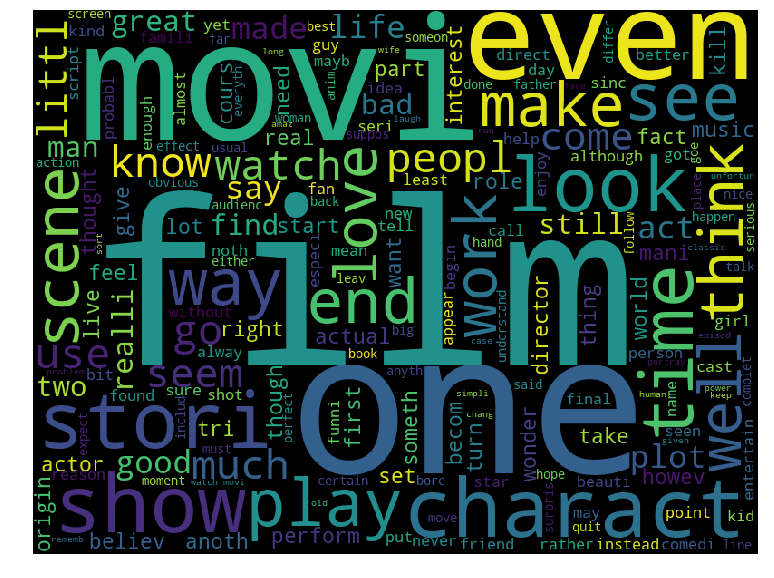

In [31]:
displayWordCloud(" ".join(clean_train_reviews))

In [32]:
df_train["num_words"] = clean_train_reviews.apply(lambda x : len(str(x).split()))
df_train["num_uniq_words"] = clean_train_reviews.apply(lambda x: len(set(str(x).split())))

# 단어 개수 컬럼 생성
# 중복을 제거한 unique 단어 개수 컬럼 생성

In [33]:
x = clean_train_reviews[0]
x = str(x).split()
print(len(x))
x[:10]

# 첫 번째 리뷰의 단어를 세어보면 219개이다. 

219


['stuff',
 'go',
 'moment',
 'mj',
 'start',
 'listen',
 'music',
 'watch',
 'odd',
 'documentari']

리뷰별 단어 평균 값:  119.52356
리뷰별 단어 중간 값:  89.0
리뷰별 고유 단어 평균 값:  94.05756
리뷰별 고유 단어 중간 값:  74.0


Text(0.5, 1.0, '리뷰별 고유 단어 수 분포')

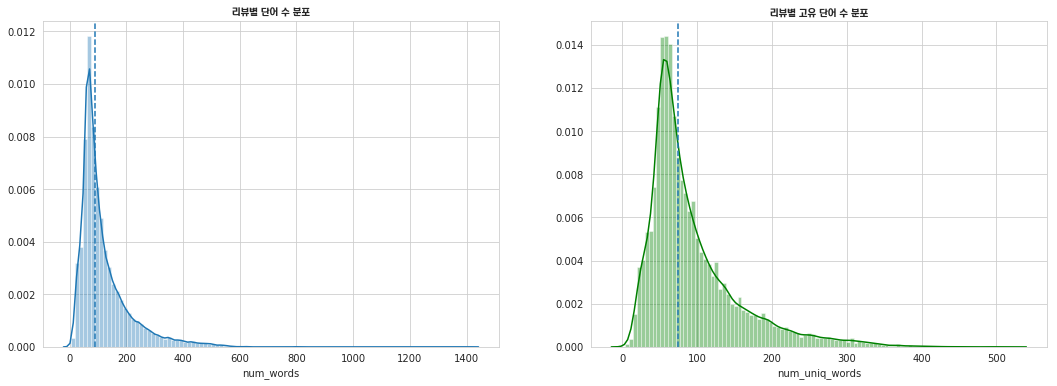

In [34]:
import seaborn as sns

fig, ax = plt.subplots(ncols = 2, figsize = (18, 6))
print("리뷰별 단어 평균 값: ", df_train["num_words"].mean())
print("리뷰별 단어 중간 값: ", df_train["num_words"].median())
sns.distplot(df_train["num_words"], bins = 100, ax = ax[0])
ax[0].axvline(df_train["num_words"].median(), linestyle = "dashed")
ax[0].set_title("리뷰별 단어 수 분포", fontproperties = fontprop)

print("리뷰별 고유 단어 평균 값: ", df_train["num_uniq_words"].mean())
print("리뷰별 고유 단어 중간 값: ", df_train["num_uniq_words"].median())
sns.distplot(df_train["num_uniq_words"], bins = 100, color = "g", ax = ax[1])
ax[1].axvline(df_train["num_uniq_words"].median(), linestyle = "dashed")
ax[1].set_title("리뷰별 고유 단어 수 분포", fontproperties = fontprop)

## Bag-of-words model

### 텍스트 데이터 벡터화

#### 다음의 두 문장이 있다고 하자, 
1. John likes to watch movies. Mary likes movies too.
2. John also likes to watch football games.

#### 위 두 문장을 토큰화하여 가방에 담아주면 다음과 같다.
[
   "John",
   "likes",
   "to",
   "watch",
   "movies",
   "Mary",
   "too",
   "also",
   "football",
   "games"
]
#### 그리고 배열의 순서대로 가방에서 각 토큰이 몇 번 등장하는지 횟수를 세어준다. 

(1) [1,2,1,1,2,1,1,0,0,0]
(2) [1,1,1,1,0,0,0,1,1,1]
#### => 머신러닝 알고리즘이 이해할 수 있는 형태로 바꿔주는 작업이다.
#### 단어 가방을 n-gram을 사용해 bigram으로 담아주면 다음과 같다.
[
   "John likes",
   "likes to",
   "to watch",
   "watch movies",
   "Mary likes",
   "likes movies",
   "movies too"
]
#### => 여기에서는 CountVectorizer를 통해 위 작업을 한다.

### Sklearn의 CountVectorizer를 통해 피처 생성

* 정규표현식을 사용해 토큰을 추출한다.
* 모두 소문자로 변환시키기 때문에 good, Good, gOOd이 모두 같은 특성이 된다.
* 의미없는 특성을 많이 생성하기 때문에 적어도 두 개의 문서에 나타난 토큰만을 사용한다.
* min_df로 토큰이 나타날 최소 문서 개수를 지정할 수 있다.

In [35]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline

# 튜토리얼과 다르게 파라미터 값을 수정
# 파라미터 값만 수정해도 리더보드 스코어 차이가 큼 
vectorizer = CountVectorizer(analyzer = "word", 
                            tokenizer = None,
                            preprocessor = None,
                            stop_words = None,
                            min_df = 2, # 토큰이 나타날 최소 문서 개수
                            ngram_range = (1, 3), # 유니그램, 바이그램 등 
                            max_features = 20000 # 최대 피쳐의 개수
                            )
vectorizer

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=20000, min_df=2,
                ngram_range=(1, 3), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [36]:
# 속도 개선을 위해 파이프라인을 사용하도록 개선

pipeline = Pipeline([
    ("vect", vectorizer),
])

In [37]:
%time train_data_features = pipeline.fit_transform(clean_train_reviews)

train_data_features

CPU times: user 46.1 s, sys: 1.18 s, total: 47.3 s
Wall time: 47.2 s


<25000x20000 sparse matrix of type '<class 'numpy.int64'>'
	with 2762268 stored elements in Compressed Sparse Row format>

In [38]:
train_data_features.shape

# 25000의 관측치와 위에서 지정해주었던 20000개의 feature로 이루어져 있음.

(25000, 20000)

In [39]:
vocab = vectorizer.get_feature_names()
print(len(vocab))
vocab[:10]

# feature의 이름 (단어)를 확인

20000


['aag',
 'aaron',
 'ab',
 'abandon',
 'abbey',
 'abbi',
 'abbot',
 'abbott',
 'abc',
 'abduct']

In [40]:
dist = np.sum(train_data_features, axis = 0)

for tag, count in zip(vocab, dist):
    print(count, tag)
    
pd.DataFrame(dist, columns = vocab)

# 단어를 count해줘서 한번에 확인 

[[26 48 22 ... 59 40 23]] aag


,aag,aaron,ab,abandon,abbey,abbi,abbot,abbott,abc,abduct,...,zombi bloodbath,zombi film,zombi flick,zombi movi,zone,zoo,zoom,zorro,zu,zucker
0,26,48,22,288,24,30,29,30,125,55,...,23,52,37,89,161,31,71,59,40,23


In [41]:
pd.DataFrame(train_data_features[:10].toarray(), columns = vocab).head()

# 각각의 row가 어떤 단어를 포함하고 있는지 확인하기 위함 

,aag,aaron,ab,abandon,abbey,abbi,abbot,abbott,abc,abduct,...,zombi bloodbath,zombi film,zombi flick,zombi movi,zone,zoo,zoom,zorro,zu,zucker
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## RandomForest로 예측해보기

In [42]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators = 100, random_state = 42, n_jobs =1)
model

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
                       oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [43]:
%time model = model.fit(train_data_features, df_train["sentiment"])

CPU times: user 1min 7s, sys: 52.3 ms, total: 1min 7s
Wall time: 1min 7s


In [44]:
from sklearn.model_selection import cross_val_score
%time score = np.mean(cross_val_score(\
                                     model, train_data_features,\
                                     df_train["sentiment"], cv = 10,\
                                     scoring = "roc_auc"))

CPU times: user 9min 34s, sys: 642 ms, total: 9min 35s
Wall time: 9min 35s


In [45]:
clean_test_reviews[0]

'natur film main theme mortal nostalgia loss innoc perhap surpris rate high older viewer younger one howev craftsmanship complet film anyon enjoy pace steadi constant charact full engag relationship interact natur show need flood tear show emot scream show fear shout show disput violenc show anger natur joyc short stori lend film readi made structur perfect polish diamond small chang huston make inclus poem fit neat truli masterpiec tact subtleti overwhelm beauti'

In [46]:
%time test_data_features = pipeline.transform(clean_test_reviews)
test_data_features = test_data_features.toarray()

# test 데이터도 똑같이 파이프라인을 사용하여 벡터화 시켜준다.

CPU times: user 12.5 s, sys: 969 µs, total: 12.5 s
Wall time: 12.5 s


In [47]:
test_data_features

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [48]:
# 벡터화하며 만든 사전에서 해당 단어가 무엇인지 찾아볼 수 있다.
# vocab = vectorizer.get_feature_names()
vocab[8], vocab[2558], vocab[2559], vocab[2560]

('abc', 'charact person', 'charact play', 'charact plot')

In [49]:
y_pred = model.predict(test_data_features)
y_pred[:10]

array([1, 0, 1, 1, 1, 0, 0, 0, 0, 1])

In [50]:
sub = pd.DataFrame(data = {"id":df_test["id"], "sentiment" : y_pred})
sub.head()

,id,sentiment
0,"""12311_10""",1
1,"""8348_2""",0
2,"""5828_4""",1
3,"""7186_2""",1
4,"""12128_7""",1


In [51]:
sub.to_csv("./tutorial_1_LB{:.5f}.csv".format(score), index = False, quoting = 3)

In [52]:
sub_sent = sub["sentiment"].value_counts()
print(sub_sent[0] - sub_sent[1])
sub_sent

# submission의 부정과 긍정의 차이를 살펴본다.

44


0    12522
1    12478
Name: sentiment, dtype: int64